<a href="https://colab.research.google.com/github/Siddheshdumre/ML_LAB_Assignments/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

file_path = "Brain_Tumor_Prediction_Dataset.csv"
df = pd.read_csv(file_path)

df.head()


,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58.0,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13.0,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67.0,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85.0,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17.0,Moderate,No,Moderate,No


In [13]:
df.drop(columns=["Country", "Blood_Pressure"], inplace=True)


In [14]:
df

,Age,Gender,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,Head_Injury_History,Chronic_Illness,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,8.70,Cerebellum,Severe,81,No,Yes,Medium,No,Yes,No,Malignant,NaN,58.0,Slow,Yes,Mild,No
1,87,Female,8.14,Temporal,Normal,65,No,Yes,Medium,No,No,No,Malignant,NaN,13.0,Rapid,Yes,Severe,No
2,41,Male,6.02,Occipital,Severe,100,Yes,No,Low,Yes,No,No,Benign,Chemotherapy,67.0,Slow,Yes,Moderate,Yes
3,52,Male,7.26,Occipital,Normal,19,Yes,Yes,High,Yes,No,Yes,Benign,Radiation,85.0,Moderate,No,Moderate,Yes
4,84,Female,7.94,Temporal,Abnormal,47,No,Yes,Medium,No,Yes,Yes,Malignant,NaN,17.0,Moderate,No,Moderate,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55660,47,Other,8.52,Parietal,Abnormal,40,Yes,No,Low,No,Yes,No,Benign,Chemotherapy,91.0,Rapid,No,Severe,No
55661,83,Male,9.78,Occipital,Normal,5,No,No,High,Yes,Yes,Yes,Malignant,NaN,69.0,Slow,Yes,Mild,No
55662,58,Male,9.14,Cerebellum,Abnormal,36,Yes,No,Medium,No,No,No,Benign,Radiation,68.0,Slow,Yes,Severe,Yes
55663,38,Male,8.19,Frontal,Abnormal,58,No,Yes,Medium,Yes,Yes,Yes,Malignant,NaN,55.0,Moderate,Yes,Severe,Yes


In [15]:
binary_features = ["Smoking_History", "Alcohol_Consumption",
                   "Head_Injury_History", "Chronic_Illness", "Diabetes", "Family_History", "Brain_Tumor_Present"]


In [16]:
for col in binary_features:
    df[col] = df[col].map({"No": 0, "Yes": 1})


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["Gender", "Tumor_Location", "MRI_Findings", "Tumor_Type","Radiation_Exposure",
                        "Treatment_Received", "Tumor_Growth_Rate", "Symptom_Severity"]

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df.head()


,Age,Gender,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,Head_Injury_History,Chronic_Illness,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,2,8.70,0,2,81,0.0,1.0,2,0.0,1.0,0.0,1,3,58.0,2,1.0,0,0.0
1,87,0,8.14,4,1,65,0.0,1.0,2,0.0,0.0,0.0,1,3,13.0,1,1.0,2,0.0
2,41,1,6.02,2,2,100,1.0,0.0,1,1.0,0.0,0.0,0,0,67.0,2,1.0,1,1.0
3,52,1,7.26,2,1,19,1.0,1.0,0,1.0,0.0,1.0,0,1,85.0,0,0.0,1,1.0
4,84,0,7.94,4,0,47,0.0,1.0,2,0.0,1.0,1.0,1,3,17.0,0,0.0,1,0.0


In [18]:

df.dropna(inplace=True)
df


,Age,Gender,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,Head_Injury_History,Chronic_Illness,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,2,8.70,0,2,81,0.0,1.0,2,0.0,1.0,0.0,1,3,58.0,2,1.0,0,0.0
1,87,0,8.14,4,1,65,0.0,1.0,2,0.0,0.0,0.0,1,3,13.0,1,1.0,2,0.0
2,41,1,6.02,2,2,100,1.0,0.0,1,1.0,0.0,0.0,0,0,67.0,2,1.0,1,1.0
3,52,1,7.26,2,1,19,1.0,1.0,0,1.0,0.0,1.0,0,1,85.0,0,0.0,1,1.0
4,84,0,7.94,4,0,47,0.0,1.0,2,0.0,1.0,1.0,1,3,17.0,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55659,83,0,8.15,1,2,77,0.0,0.0,2,0.0,1.0,1.0,0,2,34.0,1,1.0,0,1.0
55660,47,2,8.52,3,0,40,1.0,0.0,1,0.0,1.0,0.0,0,0,91.0,1,0.0,2,0.0
55661,83,1,9.78,2,1,5,0.0,0.0,0,1.0,1.0,1.0,1,3,69.0,2,1.0,0,0.0
55662,58,1,9.14,0,0,36,1.0,0.0,2,0.0,0.0,0.0,0,1,68.0,2,1.0,2,1.0


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Tumor_Size'].plot(kind='hist', bins=20, title='Tumor_Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Tumor_Location'].plot(kind='hist', bins=20, title='Tumor_Location')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Gender', y='Tumor_Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Tumor_Size', y='Tumor_Location', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Tumor_Location', y='MRI_Findings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Tumor_Size'].plot(kind='line', figsize=(8, 4), title='Tumor_Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Tumor_Location'].plot(kind='line', figsize=(8, 4), title='Tumor_Location')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Brain_Tumor_Present"])
y = df["Brain_Tumor_Present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.499326327135543

Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50      5574
         1.0       0.50      0.50      0.50      5559

    accuracy                           0.50     11133
   macro avg       0.50      0.50      0.50     11133
weighted avg       0.50      0.50      0.50     11133


Confusion Matrix:
 [[2769 2805]
 [2769 2790]]


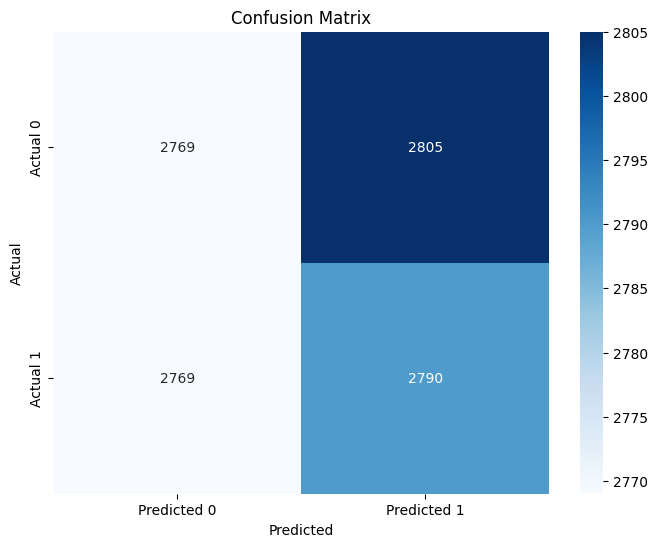

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt



conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21, 2))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Train with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best))


Best k: 17
Optimized KNN Accuracy: 0.49582322824036645


Best k: 3
Highest accuracy: 0.499326327135543


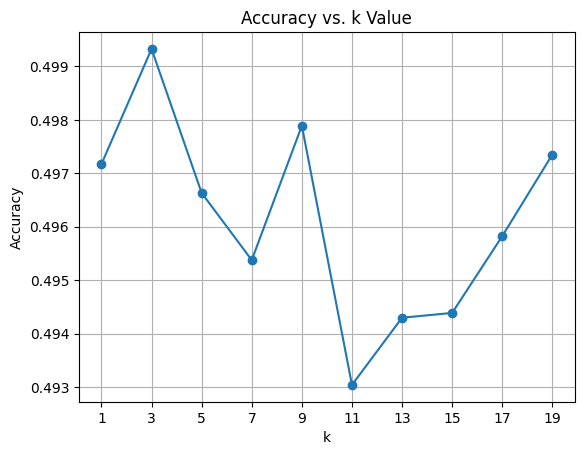

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = list(range(1, 21, 2))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k)
print("Highest accuracy:", max(accuracies))

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Ensure all k values are displayed on x-axis
plt.grid(True)
plt.show()